In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
# -----------------------------
# 1️⃣ Load MNIST dataset from .npz
# -----------------------------
with np.load('/content/mnist.npz') as data:
    x_train = data['x_train']
    x_test = data['x_test']

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.rand(*x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.rand(*x_test.shape)


In [ ]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [ ]:
input_img = layers.Input(shape=(28, 28, 1))


In [ ]:
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


In [ ]:
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=2,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 422ms/step - loss: 0.3023 - val_loss: 0.0933
Epoch 2/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 421ms/step - loss: 0.0905 - val_loss: 0.0825


In [ ]:
denoised_imgs = autoencoder.predict(x_test_noisy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


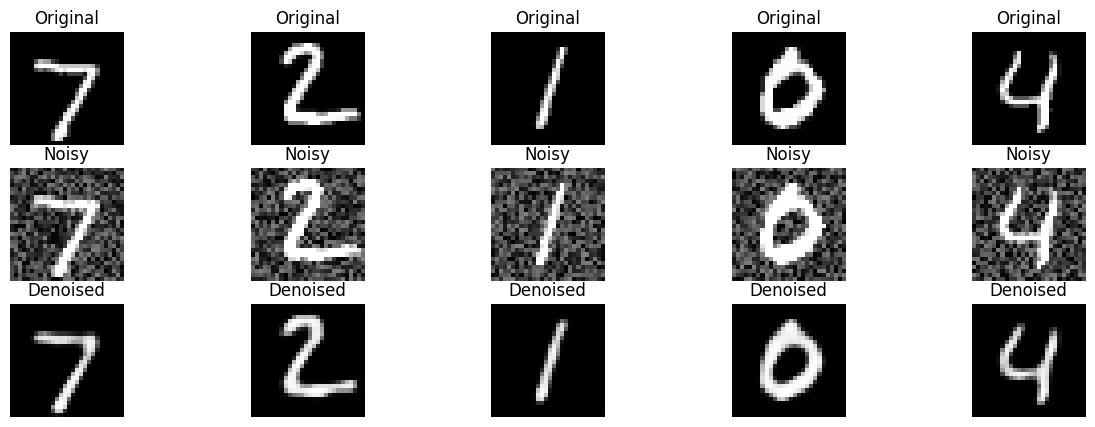

In [ ]:
n = 5  # number of samples to display
plt.figure(figsize=(15, 5))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()